In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset-tickets-multi-lang3-4k_en.csv to dataset-tickets-multi-lang3-4k_en.csv


In [ ]:
df = pd.read_csv("dataset-tickets-multi-lang3-4k_en.csv")

In [ ]:
df.head(100)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
1,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN
2,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN
3,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN
4,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,High Priority Request: Server Administration I...,"Dear Customer Support,\n\nI am writing to requ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,Service Disruption,Problem Resolution,NaN,NaN,NaN,NaN
96,Urgent Cisco Router Issue,"Dear IT Services Customer Support,\n\nWe are r...","Dear <name>,\n\nThank you for reaching out to ...",Incident,IT Support,high,en,IT Services,Technical Support,Network Issue,Service Outage,Urgent Issue,Problem Resolution,Incident Report,NaN,NaN,NaN
97,Refund Request for Returned MacBook Air M1,"Dear Customer Support, I am writing to request...","Dear <name>, \n\nThank you for your email. We ...",Request,Billing and Payments,high,en,Tech Online Store,Refund Request,Returns and Exchanges,Customer Service,Billing Issue,Order Issue,NaN,NaN,NaN,NaN
98,NaN,"Dear Customer Support,\n\nI am writing to brin...","Dear <name>,\n\nThank you for reaching out. We...",Request,Billing and Payments,high,en,Tech Online Store,Billing Issue,Account Assistance,Customer Service,Refund Request,Problem Resolution,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1391, 17)

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        1391 non-null   object 
 1   body           1391 non-null   object 
 2   answer         1391 non-null   object 
 3   type           1391 non-null   object 
 4   queue          1391 non-null   object 
 5   priority       1391 non-null   object 
 6   language       1391 non-null   object 
 7   business_type  1391 non-null   object 
 8   tag_1          1391 non-null   object 
 9   tag_2          1391 non-null   object 
 10  tag_3          1391 non-null   object 
 11  tag_4          1391 non-null   object 
 12  tag_5          1178 non-null   object 
 13  tag_6          751 non-null    object 
 14  tag_7          364 non-null    object 
 15  tag_8          107 non-null    object 
 16  tag_9          0 non-null      float64
dtypes: float64(1), object(16)
memory usage: 184.9+ KB


In [ ]:
df.isnull().sum()

,0
subject,171
body,1
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0
tag_2,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.fillna("Unknown", inplace=True)

/tmp/ipython-input-839676283.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


In [ ]:
df.isnull().sum()

,0
subject,0
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0
tag_2,0


In [ ]:
df1= pd.read_csv("dataset_tickets_english_only_clean.csv")

In [ ]:
df['final_language_check'] = df['body'].apply(detect_language)


In [ ]:
df['final_language_check'].value_counts()

,count
final_language_check,
en,1384
it,1
fr,1


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

df = pd.read_csv("dataset_tickets_english_only_clean.csv")

In [ ]:
def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return "unknown"

In [ ]:
df['language_check'] = df['body'].apply(detect_language)

In [ ]:
df_it = df[df['language_check'] == 'it']

In [ ]:
print("Number of Italian rows:", df_it.shape[0])

Number of Italian rows: 1


In [ ]:
df.loc[df['language_check'] == 'it', 'language_check'] = 'en'

In [ ]:
print("Number of Italian rows:", df_it.shape[0])

Number of Italian rows: 1


In [ ]:
df['language_check'].value_counts()

,count
language_check,
en,1386


In [ ]:
df_fr = df[df['language_check'] == 'fr']

In [ ]:
print("Number of french rows:", df_fr.shape[0])

Number of french rows: 0


In [ ]:
df.head(10)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown
1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,Unknown,Unknown,Unknown
2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue
3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,Unknown,Unknown
4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,Unknown,Unknown,Unknown
5,urgent aws deployment issues,"dear it services customer support, i hope this...","dear <name>, thank you for contacting it servi...",Request,Technical Support,medium,en,IT Services,IT Support,Service Disruption,Urgent Issue,Technical Support,System Maintenance,Incident Report,Unknown,Unknown
6,immediate assistance required for network disr...,"dear customer support, we are currently experi...","dear <name>, thank you for reaching out to us ...",Incident,Service Outages and Maintenance,high,en,IT Services,Network Issue,Service Disruption,Urgent Issue,Technical Support,Incident Report,Problem Resolution,Service Recovery,Unknown
7,NaN,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out to us....",Request,Billing and Payments,high,en,IT Services,Billing Issue,Account Assistance,Payment Processing,Customer Service,General Inquiry,Unknown,Unknown,Unknown
8,assistance needed for chrome crashes,"dear tech online store customer support, i am ...","dear <name>, thank you for contacting tech onl...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Customer Service,Unknown,Unknown,Unknown,Unknown
9,NaN,"dear customer care, i am encountering challeng...","dear <name>, we appreciate you getting in touc...",Problem,Technical Support,medium,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Account Assistance,Unknown,Unknown,Unknown


In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9', 'language_check'],
      dtype='object')

In [ ]:
df['tag_9'].unique()

array(['Unknown'], dtype=object)

In [ ]:
df['tag_9'].value_counts(dropna=False)

,count
tag_9,
Unknown,1386


In [ ]:
df.drop(columns=['tag_9'], inplace=True)

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'language_check'],
      dtype='object')

In [ ]:
df.drop(columns=['language_check'], inplace=True)

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8'],
      dtype='object')

In [ ]:
df['tag_7'].unique()

array(['Performance Tuning', 'Unknown', 'Service Recovery',
       'Product Support', 'Service Notification', 'Critical Failure',
       'Incident Report', 'Service Disruption', 'Technical Guidance',
       'Problem Resolution', 'Hardware Failure', 'General Inquiry',
       'Urgent Issue', 'Cost Optimization', 'Refund Request',
       'Product Replacement', 'Email Setup', 'System Maintenance',
       'Consultation Request', 'System Crash', 'Cloud Services',
       'Order Issue', 'Technical Support', 'Account Assistance',
       'Login Issue', 'Customer Service', 'Warranty Claim',
       'Network Issue', 'IT Support', 'Documentation Request',
       'Customer Feedback', 'Software Bug', 'Feature Request',
       'Planned Change', 'Invoice Inquiry', 'Sales Inquiry',
       'AWS Management Service', 'Payment Processing',
       'WiFi Connectivity', 'Cloud Computing', 'Printer Issue',
       'Routine Request', 'Project Management', 'Cooling Issues',
       'Security Vulnerability', 'Server 

In [ ]:
df['tag_7'].value_counts(dropna=False)

,count
tag_7,
Unknown,1022
Service Recovery,54
Technical Guidance,41
Performance Tuning,34
Problem Resolution,29
Urgent Issue,23
Customer Service,15
General Inquiry,14
System Maintenance,13


In [ ]:
df = df.rename(columns={
    'tag_1': 'tag1_primary_issue_type',
    'tag_2': 'tag2_support_category',
    'tag_3': 'tag3_issue_nature',
    'tag_4': 'tag4_technology_area',
    'tag_5': 'tag5_resolution_type',
    'tag_6': 'tag6_support_action',
    'tag_7': 'tag7_performance_aspect',
    'tag_8': 'tag8_urgency_level'
})

print("\nTag columns renamed successfully")
print("Updated columns:")
print(df.columns)


Tag columns renamed successfully
Updated columns:
Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag1_primary_issue_type', 'tag2_support_category',
       'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type',
       'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level'],
      dtype='object')


In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag1_primary_issue_type', 'tag2_support_category',
       'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type',
       'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level'],
      dtype='object')

In [ ]:
from google.colab import files

files.download("dataset_tickets_with_descriptive_tags.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(2)

,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,tag2_support_category,tag3_issue_nature,tag4_technology_area,tag5_resolution_type,tag6_support_action,tag7_performance_aspect,tag8_urgency_level
0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown
1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,Unknown,Unknown,Unknown


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df01 = df.insert(0, 'id', range(0, len(df)))

In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,tag2_support_category,tag3_issue_nature,tag4_technology_area,tag5_resolution_type,tag6_support_action,tag7_performance_aspect,tag8_urgency_level
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,Unknown,Unknown,Unknown
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,Unknown,Unknown
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,Unknown,Unknown,Unknown


In [ ]:
df.to_csv("dataset_tickets_final_with_id.csv", index=False)

In [ ]:
from google.colab import files

files.download("dataset_tickets_final_with_id.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_1 dataset_tickets_final_with_id.csv to updated_1 dataset_tickets_final_with_id.csv


In [ ]:
df = pd.read_csv("updated_1 dataset_tickets_final_with_id.csv")

In [ ]:
df.shape

(1386, 17)

In [ ]:
df['subject_length'] = df['subject'].astype(str).apply(len)

df['body_length'] = df['body'].astype(str).apply(len)

In [ ]:
print(max(df['subject_length']))

0       39
1       46
2       54
3       19
4       69
        ..
1381    47
1382    28
1383    50
1384    32
1385    54
Name: subject_length, Length: 1386, dtype: int64


In [ ]:
print(max(df['subject_length']))

104


In [ ]:
print(min(df['subject_length']))

3


In [ ]:
tag_columns = ['tag1_primary_issue_type', 'tag2_support_category', 'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type', 'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level']
df['tag_count'] = df[tag_columns].apply(
    lambda row: sum(row != 'Unknown'),
    axis=1
)

In [ ]:
print(tag_columns)

['tag1_primary_issue_type', 'tag2_support_category', 'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type', 'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level']


In [ ]:
print(df[['subject_length', 'body_length', 'tag_count']].head())

   subject_length  body_length  tag_count
0              39          925          7
1              46          397          5
2              54         1262          8
3              19          850          6
4              69          692          5


In [ ]:
df.head(1)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,tag2_support_category,tag3_issue_nature,tag4_technology_area,tag5_resolution_type,tag6_support_action,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown,39,925,7


Mark tickets as urgent if urgency level indicates urgency

In [ ]:
df['is_urgent_ticket'] = df['tag8_urgency_level'].apply(
    lambda x: 1 if 'urgent' in str(x).lower() else 0
)

In [ ]:
df['is_urgent_ticket']

,is_urgent_ticket
0,0
1,0
2,1
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,0


In [ ]:
df['is_performance_issue'] = df['tag7_performance_aspect'].apply(
    lambda x: 1 if 'performance' in str(x).lower() else 0
)

In [ ]:
df['is_performance_issue']

,is_performance_issue
0,1
1,0
2,1
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,1


In [ ]:
df['is_software_issue'] = df['tag1_primary_issue_type'].apply(
    lambda x: 1 if 'software' in str(x).lower() else 0
)
df['is_software_issue']

,is_software_issue
0,0
1,0
2,0
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,0


In [ ]:
df['is_hardware_issue'] = df['tag1_primary_issue_type'].apply(
    lambda x: 1 if 'hardware' in str(x).lower() else 0
)

In [ ]:
df['is_hardware_issue']

,is_hardware_issue
0,0
1,0
2,0
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,0


High Information Ticket Flag

In [ ]:
df['is_high_detail_ticket'] = df['body_length'].apply(
    lambda x: 1 if x > df['body_length'].median() else 0
)
df['is_high_detail_ticket']

,is_high_detail_ticket
0,1
1,0
2,1
3,1
4,1
...,...
1381,1
1382,1
1383,0
1384,1


In [ ]:
output_file = "updated_3_dataset_tickets_advanced_features.csv"
df.to_csv(output_file, index=False)

In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Urgent Issue,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1


In [ ]:
df.columns

Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag1_primary_issue_type',
       'tag2_support_category', 'tag3_issue_nature', 'tag4_technology_area',
       'tag5_resolution_type', 'tag6_support_action',
       'tag7_performance_aspect', 'tag8_urgency_level', 'subject_length',
       'body_length', 'tag_count', 'is_urgent_ticket', 'is_performance_issue',
       'is_software_issue', 'is_hardware_issue', 'is_high_detail_ticket'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.shape

(1386, 25)

In [ ]:
print(df.isnull().sum())

id                           0
subject                    172
body                         0
answer                       0
type                         0
queue                        0
priority                     0
language                     0
business_type                0
tag1_primary_issue_type      0
tag2_support_category        0
tag3_issue_nature            0
tag4_technology_area         0
tag5_resolution_type         0
tag6_support_action          0
tag7_performance_aspect      0
tag8_urgency_level           0
subject_length               0
body_length                  0
tag_count                    0
is_urgent_ticket             0
is_performance_issue         0
is_software_issue            0
is_hardware_issue            0
is_high_detail_ticket        0
dtype: int64


In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Urgent Issue,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1


In [ ]:
df.fillna("unknown", inplace=True)

In [ ]:
validation_columns = [
    'tag_count',
    'subject_length',
    'body_length',
    'is_urgent_ticket',
    'is_performance_issue',
    'is_software_issue',
    'is_hardware_issue',
    'is_high_detail_ticket'
]

print("\nFeature distribution summary:")
print(df[validation_columns].describe())


Feature distribution summary:
         tag_count  subject_length  body_length  is_urgent_ticket  \
count  1386.000000     1386.000000  1386.000000       1386.000000   
mean      5.729437       36.634921   686.409091          0.005051   
std       1.155598       17.873427   451.060481          0.070913   
min       4.000000        3.000000    26.000000          0.000000   
25%       5.000000       26.000000   305.000000          0.000000   
50%       6.000000       39.000000   588.000000          0.000000   
75%       7.000000       49.000000  1030.000000          0.000000   
max       8.000000      104.000000  2454.000000          1.000000   

       is_performance_issue  is_software_issue  is_hardware_issue  \
count           1386.000000        1386.000000        1386.000000   
mean               0.024531           0.010823           0.002165   
std                0.154747           0.103504           0.046491   
min                0.000000           0.000000           0.000000   
25

In [ ]:
categorical_columns = [
    'type',
    'tag1_primary_issue_type',
    'tag2_support_category',
    'tag3_issue_nature',
    'tag4_technology_area',
    'tag5_resolution_type',
    'tag6_support_action',
    'tag7_performance_aspect',
    'tag8_urgency_level'
]

label_encoders = {}

for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col + "_encoded"] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

print("\nCategorical encoding completed")

In [ ]:
encoded_cols = [col for col in df.columns if col.endswith("_encoded")]
print("\nEncoded feature columns:")
print(encoded_cols)

print("\nSample encoded values:")
print(df[encoded_cols].head())


In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,is_high_detail_ticket,type_encoded,tag1_primary_issue_type_encoded,tag2_support_category_encoded,tag3_issue_nature_encoded,tag4_technology_area_encoded,tag5_resolution_type_encoded,tag6_support_action_encoded,tag7_performance_aspect_encoded,tag8_urgency_level_encoded
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,1,3,11,41,35,8,38,50,23,30
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,0,1,30,41,34,42,50,54,43,30
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,1,0,26,12,28,62,48,48,23,31
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,1,1,30,23,40,27,38,43,43,30
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,1,3,11,39,28,51,59,54,43,30


In [ ]:
from google.colab import files

files.download("updated_3_dataset_tickets_advanced_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_3_dataset_tickets_advanced_features.csv to updated_3_dataset_tickets_advanced_features.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("updated_3_dataset_tickets_advanced_features.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)

Dataset loaded successfully
Shape: (1386, 25)


In [ ]:
df['subject'].isnull().sum()

np.int64(172)

In [ ]:
df[df['subject'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket


In [ ]:
df['subject'] = df['subject'].str.replace("Unknown\t", "Unknown", regex=False)

# Optional: remove any remaining extra whitespace
df['subject'] = df['subject'].str.strip()

# Verify replacement
df['subject'].value_counts().head(10)

,count
subject,
Unknown,172
reported charging problem with iphone,2
connectivity issues with hp deskjet 3755,2
request for macbook air m1 replacement,2
inquiry on macbook air m1 availability,2
touchscreen issue with surface pro 7,1
problem with norton antivirus plus,1
urgent: screen flickering issue with dell xps 13 9310,1
urgent: immediate help required for react app issue,1


In [ ]:
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Other,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1
5,5,urgent aws deployment issues,"dear it services customer support, i hope this...","dear <name>, thank you for contacting it servi...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,28,629,6,0,0,0,0,1
6,6,immediate assistance required for network disr...,"dear customer support, we are currently experi...","dear <name>, thank you for reaching out to us ...",Incident,Service Outages and Maintenance,high,en,IT Services,Network Issue,...,Service Recovery,Unknown,52,629,7,0,0,0,0,1
7,7,Unknown,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out to us....",Request,Billing and Payments,high,en,IT Services,Billing Issue,...,Unknown,Unknown,3,588,5,0,0,0,0,0
8,8,assistance needed for chrome crashes,"dear tech online store customer support, i am ...","dear <name>, thank you for contacting tech onl...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,...,Unknown,Unknown,36,466,4,0,0,0,0,0
9,9,Unknown,"dear customer care, i am encountering challeng...","dear <name>, we appreciate you getting in touc...",Problem,Technical Support,medium,en,IT Services,Technical Support,...,Unknown,Unknown,3,399,5,0,0,0,0,0


In [ ]:
df[df['subject'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

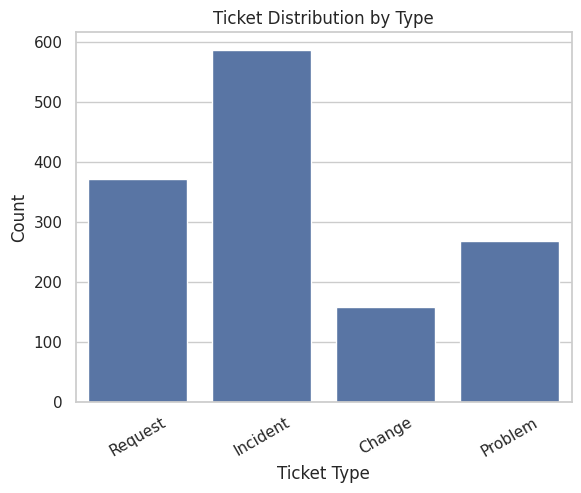

In [ ]:
plt.figure()
sns.countplot(data=df, x='type')
plt.title("Ticket Distribution by Type")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


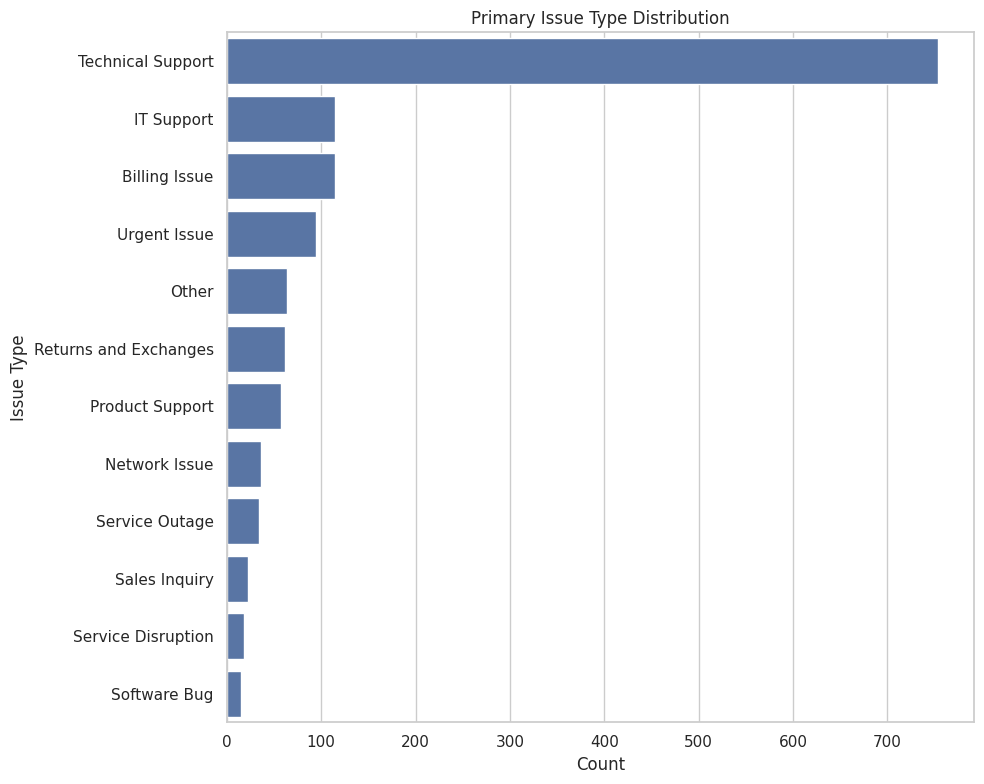

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(
    data=df,
    y='tag1_primary_issue_type',
    order=df['tag1_primary_issue_type'].value_counts().index
)
plt.title("Primary Issue Type Distribution")
plt.xlabel("Count")
plt.ylabel("Issue Type")
plt.tight_layout()
plt.show()


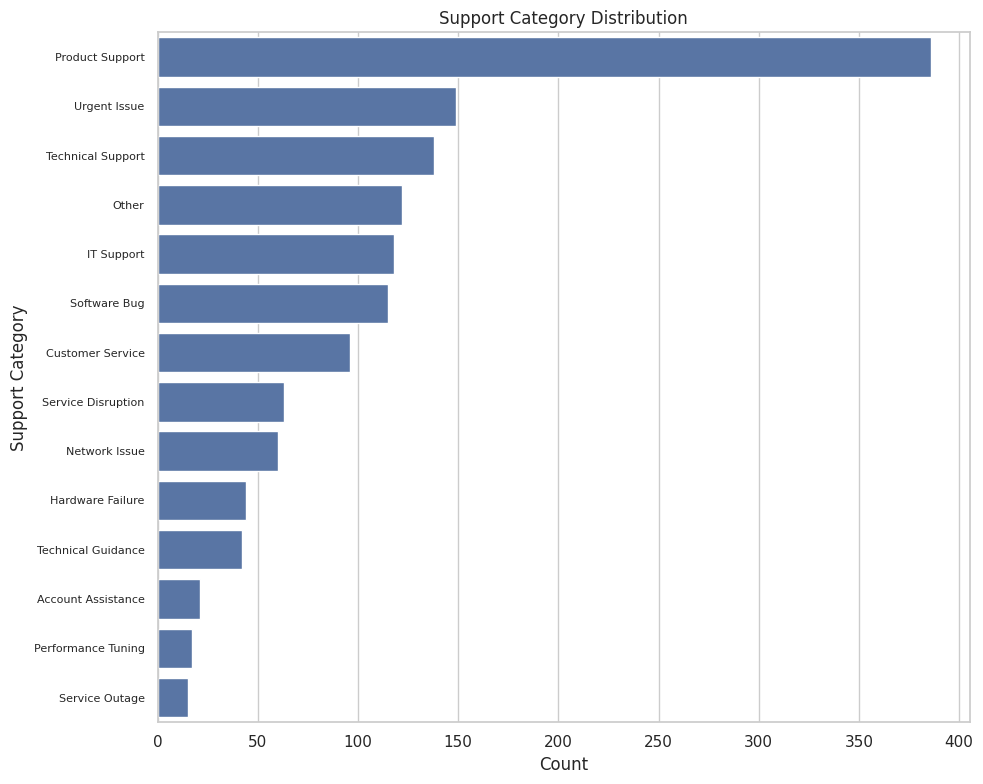

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(
    data=df,
    y='tag2_support_category',
    order=df['tag2_support_category'].value_counts().index
)
plt.title("Support Category Distribution")
plt.xlabel("Count")
plt.ylabel("Support Category")
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

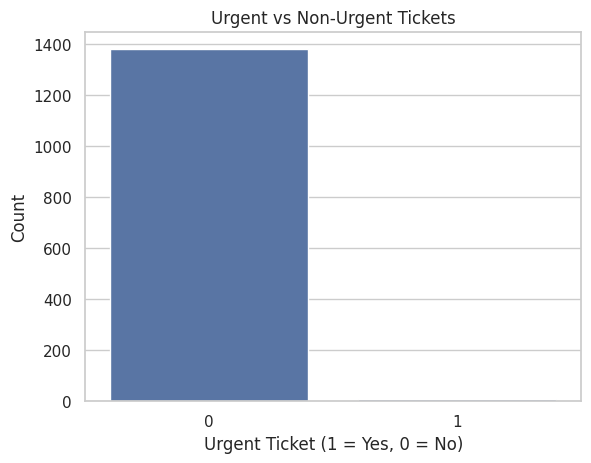

In [ ]:
plt.figure()
sns.countplot(data=df, x='is_urgent_ticket')
plt.title("Urgent vs Non-Urgent Tickets")
plt.xlabel("Urgent Ticket (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


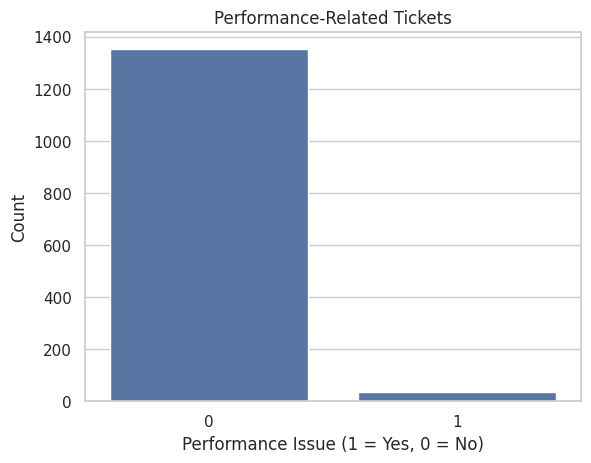

In [ ]:
plt.figure()
sns.countplot(data=df, x='is_performance_issue')
plt.title("Performance-Related Tickets")
plt.xlabel("Performance Issue (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


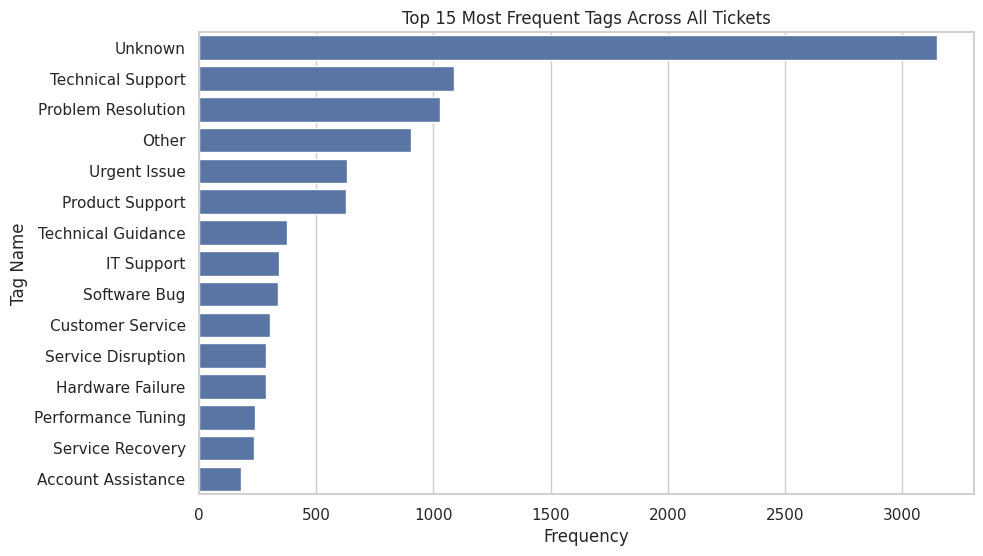

In [ ]:
all_tags = pd.concat([df[col] for col in tag_columns])

all_tags = all_tags[all_tags != 'unknown']

tag_counts = all_tags.value_counts().reset_index()
tag_counts.columns = ['Tag_Name', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=tag_counts.head(15),
    x='Frequency',
    y='Tag_Name'
)

plt.title("Top 15 Most Frequent Tags Across All Tickets")
plt.xlabel("Frequency")
plt.ylabel("Tag Name")
plt.show()



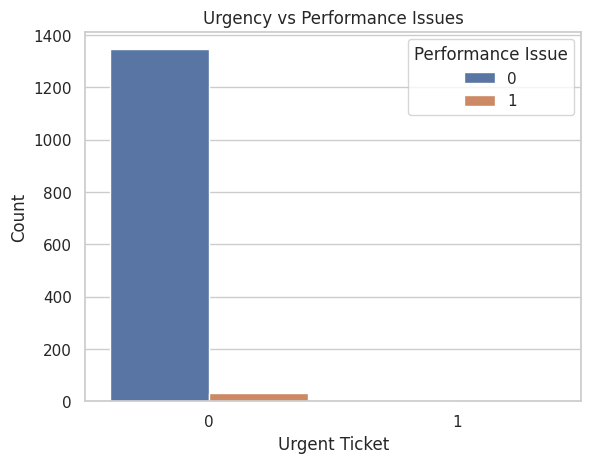

In [ ]:
plt.figure()
sns.countplot(
    data=df,
    x='is_urgent_ticket',
    hue='is_performance_issue'
)
plt.title("Urgency vs Performance Issues")
plt.xlabel("Urgent Ticket")
plt.ylabel("Count")
plt.legend(title="Performance Issue")
plt.show()


In [ ]:
df[['body_length', 'is_high_detail_ticket']].head(10)

,body_length,is_high_detail_ticket
0,925,1
1,397,0
2,1262,1
3,850,1
4,692,1
5,629,1
6,629,1
7,588,0
8,466,0
9,399,0


In [ ]:
urgent_counts = df['is_urgent_ticket'].value_counts()

print("Urgent vs Not Urgent Ticket Count:")
print(urgent_counts)

Urgent vs Not Urgent Ticket Count:
is_urgent_ticket
0    1379
1       7
Name: count, dtype: int64


In [ ]:
def group_sparse_categories(df, column, threshold=15):
    counts = df[column].value_counts()
    sparse_categories = counts[counts < threshold].index
    df[column] = df[column].replace(sparse_categories, 'Other')
    return df

columns_to_group = [
    'type',
    'tag1_primary_issue_type',
    'tag2_support_category',
    'tag3_issue_nature',
    'tag4_technology_area',
    'tag5_resolution_type',
    'tag6_support_action',
    'tag7_performance_aspect',
    'tag8_urgency_level'
]

for col in columns_to_group:
    df = group_sparse_categories(df, col)

print("Sparse categories grouped into 'Other' for selected columns.")

print(f"\nValue counts for 'type' after grouping:")
print(df['type'].value_counts())

Sparse categories grouped into 'Other' for selected columns.

Value counts for 'type' after grouping:
type
Incident    587
Request     372
Problem     268
Change      159
Name: count, dtype: int64


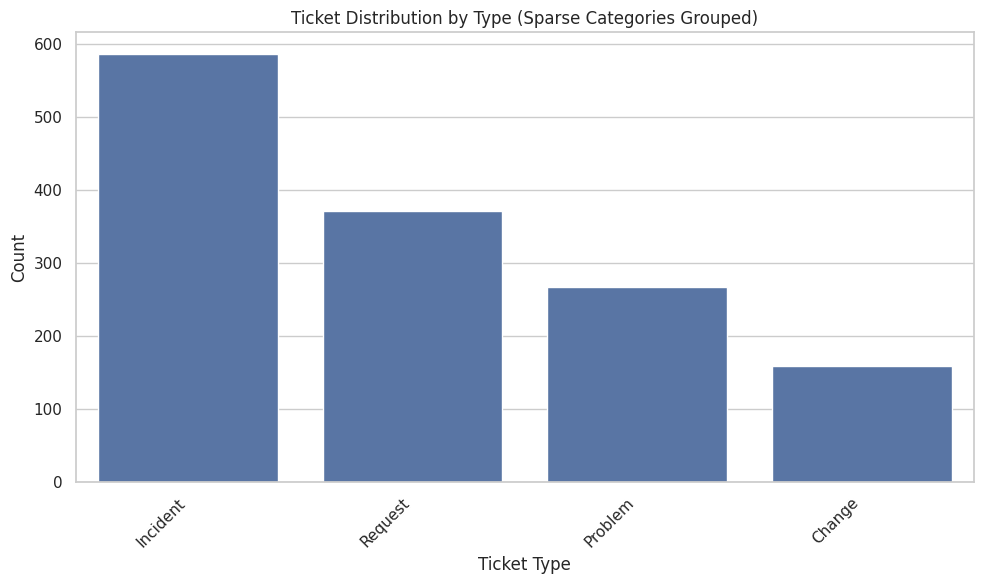

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Ticket Distribution by Type (Sparse Categories Grouped)")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
priority_counts = df['priority'].value_counts()
print(priority_counts)

priority
high      592
medium    555
low       239
Name: count, dtype: int64


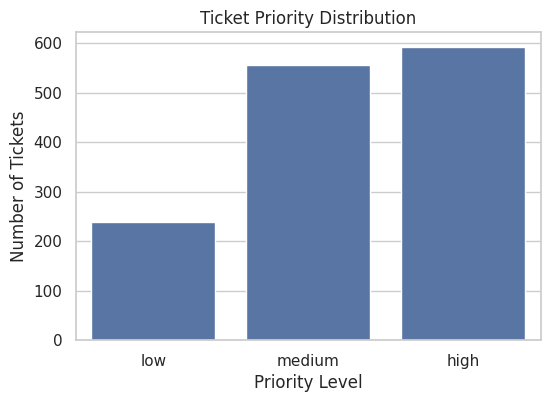

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='priority',
    order=['low', 'medium', 'high']
)

plt.title("Ticket Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.show()

In [ ]:
df.head(1)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1


In [ ]:
df.to_csv('final_dataset_tickets_ready_for_eda.csv', index=False)
print("Dataset saved as 'final_dataset_tickets_ready_for_eda.csv'")

Dataset saved as 'final_dataset_tickets_ready_for_eda.csv'


In [ ]:
from google.colab import files

files.download('final_dataset_tickets_ready_for_eda.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2 week final_dataset_tickets_ready_for_eda (2).csv to 2 week final_dataset_tickets_ready_for_eda (2).csv


In [ ]:
df = pd.read_csv("2 week final_dataset_tickets_ready_for_eda (2).csv")

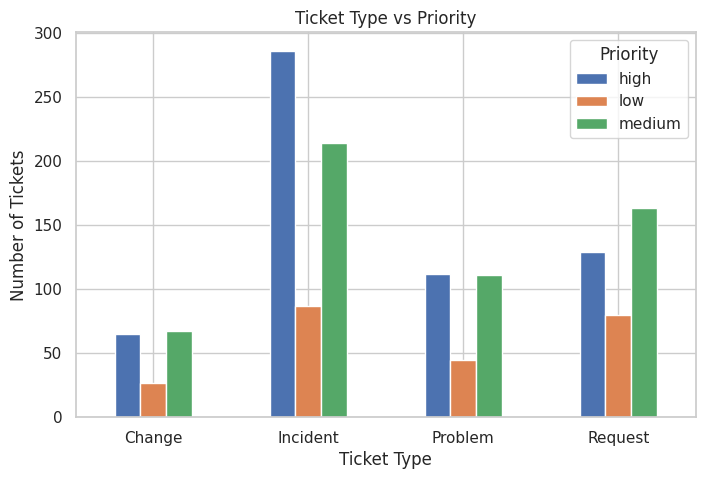

In [ ]:
type_priority_ct = pd.crosstab(df['type'], df['priority'])

type_priority_ct.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("Ticket Type vs Priority")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=0)
plt.legend(title="Priority")
plt.show()


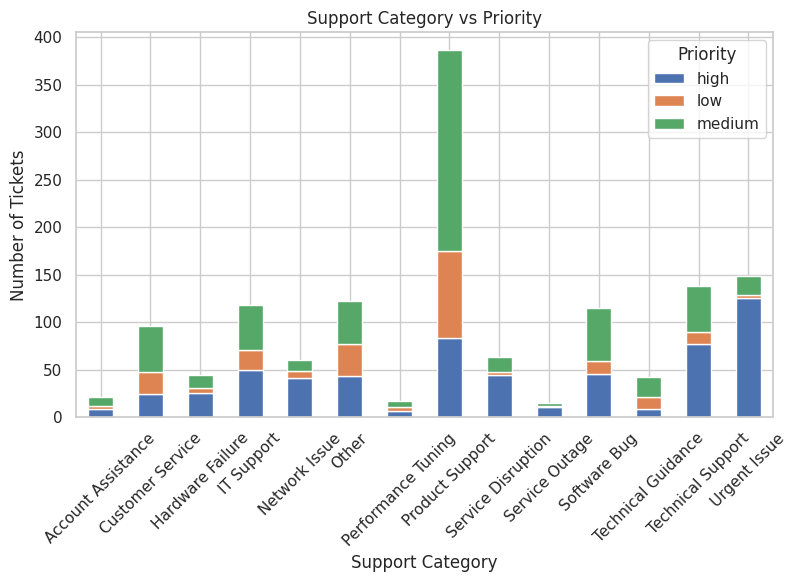

In [ ]:
support_priority_ct = pd.crosstab(df['tag2_support_category'], df['priority'])

support_priority_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)

plt.title("Support Category vs Priority")
plt.xlabel("Support Category")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Priority")
plt.show()


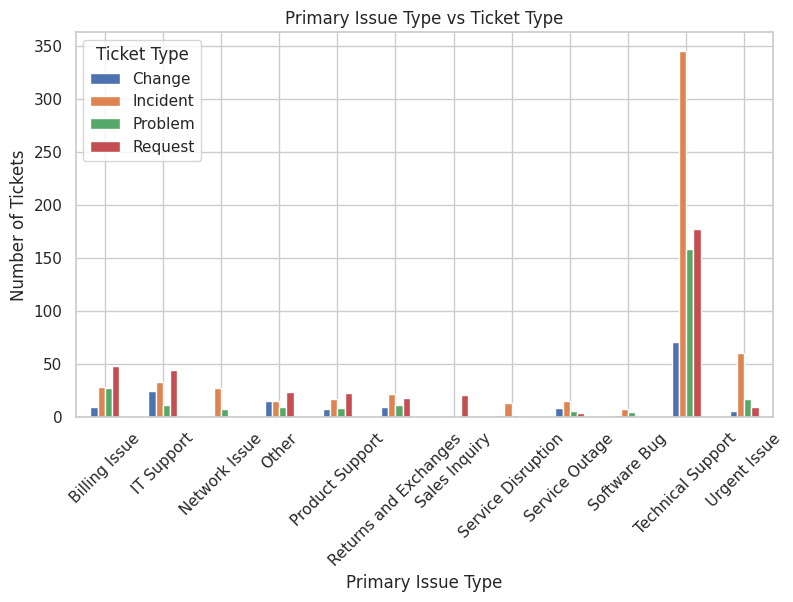

In [ ]:
issue_type_ct = pd.crosstab(
    df['tag1_primary_issue_type'],
    df['type']
)

issue_type_ct.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title("Primary Issue Type vs Ticket Type")
plt.xlabel("Primary Issue Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Ticket Type")
plt.show()


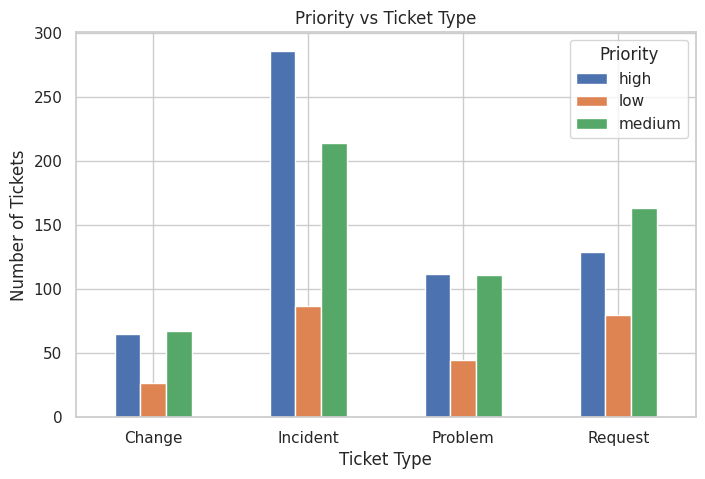

In [ ]:
priority_type_ct = pd.crosstab(df['type'], df['priority'])

priority_type_ct.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("Priority vs Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=0)
plt.legend(title="Priority")
plt.show()


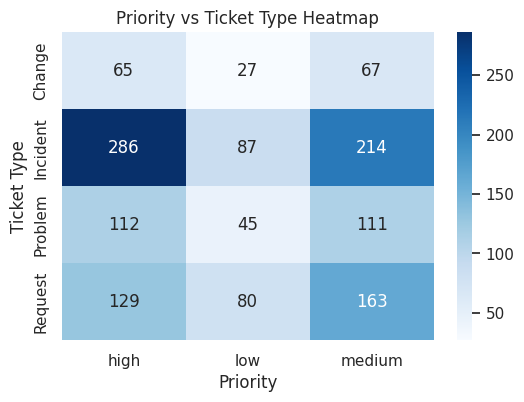

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    priority_type_ct,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title("Priority vs Ticket Type Heatmap")
plt.xlabel("Priority")
plt.ylabel("Ticket Type")
plt.show()


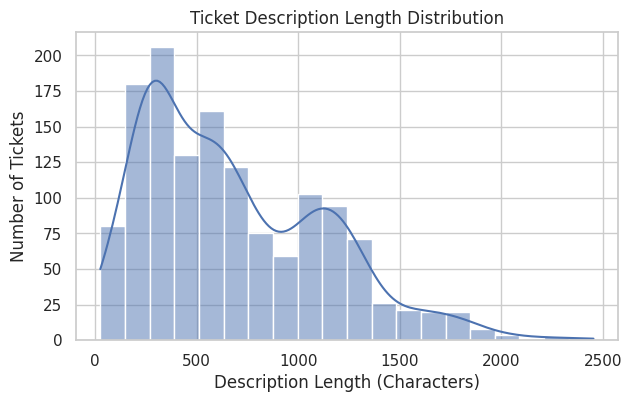

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(
    df['body_length'],
    bins=20,
    kde=True
)

plt.title("Ticket Description Length Distribution")
plt.xlabel("Description Length (Characters)")
plt.ylabel("Number of Tickets")
plt.show()


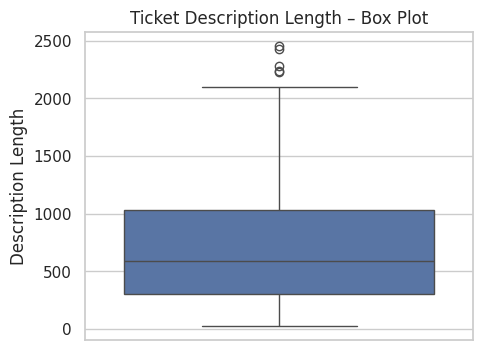

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['body_length'])

plt.title("Ticket Description Length – Box Plot")
plt.ylabel("Description Length")
plt.show()


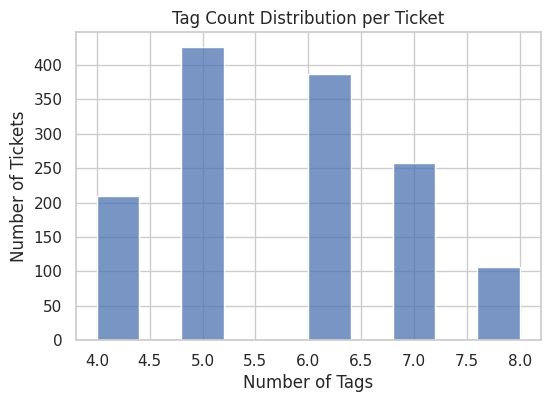

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    df['tag_count'],
    bins=10
)

plt.title("Tag Count Distribution per Ticket")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Tickets")
plt.show()


Shows how many issue dimensions are typically associated with a ticket.

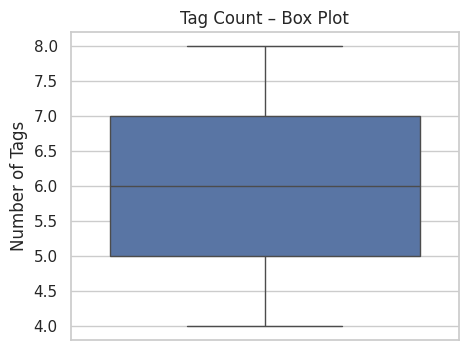

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['tag_count'])

plt.title("Tag Count – Box Plot")
plt.ylabel("Number of Tags")
plt.show()


In [ ]:
df.to_csv('processed_tickets_data.csv', index=False)
from google.colab import files

files.download('processed_tickets_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving processed_tickets_data .1 week 3.csv to processed_tickets_data .1 week 3.csv


In [4]:
df = pd.read_csv("processed_tickets_data .1 week 3.csv")


In [5]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Other,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1


In [10]:
print("\nSummary statistics of similarity features:")
X_similarity.describe()


Summary statistics of similarity features:


,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,36.634921,686.409091,5.729437,0.005051,0.024531,0.010823,0.002165,0.497835
std,17.873427,451.060481,1.155598,0.070913,0.154747,0.103504,0.046491,0.500176
min,3.000000,26.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,305.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,588.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1030.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,104.000000,2454.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
clustering_features = [
    'subject_length',
    'body_length',
    'tag_count',
    'is_urgent_ticket',
    'is_performance_issue',
    'is_software_issue',
    'is_hardware_issue',
    'is_high_detail_ticket'
]

X = df[clustering_features]

print("\nSelected clustering features:")
print(clustering_features)
print("Clustering feature matrix shape:", X.shape)


Selected clustering features:
['subject_length', 'body_length', 'tag_count', 'is_urgent_ticket', 'is_performance_issue', 'is_software_issue', 'is_hardware_issue', 'is_high_detail_ticket']
Clustering feature matrix shape: (1386, 8)


In [15]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("\nFeature scaling completed")
print("Scaled feature matrix shape:", X_scaled.shape)


Feature scaling completed
Scaled feature matrix shape: (1386, 8)


In [17]:
from sklearn.cluster import KMeans

elbow method

In [18]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

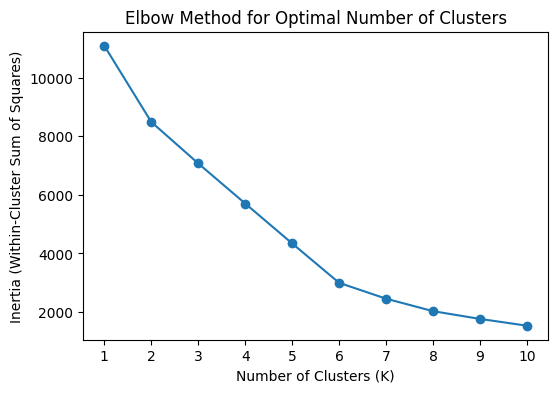

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')

plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.show()

In [21]:
kmeans = KMeans(
    n_clusters=6,
    random_state=42,
    n_init=10
)

df['cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering completed successfully")


Clustering completed successfully


In [22]:
df['cluster'].value_counts().sort_index()

,count
cluster,
0,680
1,648
2,3
3,7
4,33
5,15


In [23]:
df[['id', 'cluster'] + clustering_features].head()


,id,cluster,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,4,39,925,7,0,1,0,0,1
1,1,0,46,397,5,0,0,0,0,0
2,2,3,54,1262,8,1,1,0,0,1
3,3,1,19,850,6,0,0,0,0,1
4,4,1,69,692,5,0,0,0,0,1


In [25]:
cluster_profile = df.groupby('cluster')[
    [
        'subject_length',
        'body_length',
        'tag_count',
        'is_urgent_ticket',
        'is_performance_issue',
        'is_software_issue',
        'is_hardware_issue',
        'is_high_detail_ticket'
    ]
].mean()

cluster_profile


,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
cluster,,,,,,,,
0,34.201471,323.958824,5.195588,0.0,0.000000,0.0,0.0,0.000000
1,38.949074,1042.936728,6.191358,0.0,0.000000,0.0,0.0,1.000000
2,19.000000,567.666667,4.666667,0.0,0.000000,0.0,1.0,0.333333
3,39.000000,961.714286,8.000000,1.0,0.142857,0.0,0.0,0.857143
4,45.030303,1022.606061,7.272727,0.0,1.000000,0.0,0.0,0.787879
5,30.933333,871.133333,5.733333,0.0,0.000000,1.0,0.0,0.600000


In [26]:
priority_cluster = pd.crosstab(df['cluster'], df['priority'])
priority_cluster

priority,high,low,medium
cluster,,,
0,285,130,265
1,272,105,271
2,3,0,0
3,3,1,3
4,20,2,11
5,9,1,5


Ticket Type Distribution per Cluster

In [27]:
type_cluster = pd.crosstab(df['cluster'], df['type'])
type_cluster

type,Change,Incident,Problem,Request
cluster,,,,
0,73,289,126,192
1,79,269,132,168
2,0,1,1,1
3,1,2,2,2
4,4,18,2,9
5,2,8,5,0


In [28]:
issue_cluster = df.groupby('cluster')['tag1_primary_issue_type'].agg(
    lambda x: x.value_counts().index[0]
)

issue_cluster

,tag1_primary_issue_type
cluster,
0,Technical Support
1,Technical Support
2,Other
3,Technical Support
4,Technical Support
5,Software Bug
